In [2]:
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data\\real\\df_final.csv', sep =',', low_memory=False, encoding="utf-8")
df.head()


,GLU_ULTIMA/LAST_URG/EMERG,DESTINO/DESTINY_URG/EMERG,TEMP_PRIMERA/FIRST_URG/EMERG,MOTIVO_ALTA/DESTINY_DISCHARGE_ING,ESPECIALIDAD/DEPARTMENT_URG/EMERG,TA_MIN_ULTIMA/LAST_URG/EMERG,EDAD/AGE,FC/HR_PRIMERA/FIRST_URG/EMERG,TEMP_ULTIMA/LAST_URG/EMERG,TA_MAX_ULTIMA/LAST_URGEMERG,...,PROC_13,PROC_04_DS6,POAD_09,NEO_06,DIA_12_DS6,PROC_07,PROC_19,PROC_10,PROC_17,DIA_05_DS6
0,0,NaN,0,Domicilio,NaN,0,75,0,0,0,...,B2111ZZ,0JH604Z,N,NaN,L97.119,04CK0ZZ,3E0F7SF,0JCL0ZZ,4A133B1,Z16.24
1,0,Ingreso,0,Domicilio,Medicina de Urgencias,101,62,105,0,160,...,3E013NZ,0QU03JZ,N,NaN,K74.60,0PS43ZZ,B54DZZZ,0QU03JZ,BW24ZZZ,R20.1
2,0,Ingreso,"37,09999847",Domicilio,Medicina de Urgencias,83,69,92,37,141,...,3E0F73Z,DP081ZZ,S,NaN,N13.39,4A02X4Z,NaN,3E03328,NaN,B97.29
3,0,Ingreso,36,Fallecimiento,Medicina Interna,82,67,84,36,151,...,3E013GC,30233R1,N,NaN,N39.0,0BB68ZX,02HV33Z,3E0F7SF,BW21YZZ,J96.00
4,0,Ingreso,"37,8",Domicilio,Medicina de Urgencias,71,72,80,"37,79999924",146,...,NaN,0W3P8ZZ,S,NaN,I10,4A043R1,NaN,B246ZZZ,NaN,K29.70


In [1]:
# see the actual path directory 
import os
print(os.getcwd())
# change the path to the directory where the dataset is located

os.chdir('c:\\Users\\Lenovo\\Desktop\\MASTER\\2º Cuatrimestre\\TFM\\2º fase\\r35_historia_clinica_sintetica\\R35_sopra_steria')

c:\Users\Lenovo\Desktop\MASTER\2º Cuatrimestre\TFM\2º fase\r35_historia_clinica_sintetica\R35_sopra_steria\notebooks


In [3]:
# filtrar dataframe
df_covid = df[df['DIAG ING/INPAT'].str.contains('COVID19', na=False, case=False)]
# Mostrar las primeras filas del dataframe filtrado
print("Primeras filas del dataframe filtrado por COVID19:")
print(df_covid.head())

Primeras filas del dataframe filtrado por COVID19:
   GLU_ULTIMA/LAST_URG/EMERG DESTINO/DESTINY_URG/EMERG  \
0                          0                       NaN   
1                          0                   Ingreso   
2                          0                   Ingreso   
3                          0                   Ingreso   
4                          0                   Ingreso   

  TEMP_PRIMERA/FIRST_URG/EMERG MOTIVO_ALTA/DESTINY_DISCHARGE_ING  \
0                            0                         Domicilio   
1                            0                         Domicilio   
2                  37,09999847                         Domicilio   
3                           36                     Fallecimiento   
4                         37,8                         Domicilio   

  ESPECIALIDAD/DEPARTMENT_URG/EMERG  TA_MIN_ULTIMA/LAST_URG/EMERG  EDAD/AGE  \
0                               NaN                             0        75   
1             Medicina de Urgenci

In [4]:
df_covid.describe()

,GLU_ULTIMA/LAST_URG/EMERG,TA_MIN_ULTIMA/LAST_URG/EMERG,EDAD/AGE,FC/HR_PRIMERA/FIRST_URG/EMERG,TA_MAX_ULTIMA/LAST_URGEMERG,UCI_DIAS/ICU_DAYS,GLU_PRIMERA/FIRST_URG/EMERG,TA_MIN_PRIMERA/FIRST_URG/EMERG,PATIENT ID,SAT_02_ULTIMA/LAST_URG/EMERG,...,FC/HR_ULTIMA/LAST_URG/EMERG,SAT_02_PRIMERA/FIRST_URG/EMERG,DOSIS_MEDIA_DIARIA/DAILY_AVRG_DOSE,TA_MIN_ING/INPAT,GLU/GLY_ING/INPAT,TEMP_ING/INPAT,FC/HR_ING/INPAT,TA_MAX_ING/INPAT,SAT_02_ING/INPAT,NEO_06
count,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,179.000000,2238.000000,2238.000000,2238.000000,2238.000000,...,2238.000000,2238.000000,2238.000000,2238.000000,2238.0,2238.000000,2238.000000,2238.000000,2238.000000,0.0
mean,2.379357,51.980340,67.596962,70.821269,90.369973,6.765363,1.941912,49.144325,1173.704647,78.586238,...,75.523235,73.898570,2.367739,35.945487,0.0,35.240885,56.260947,63.196157,1.012064,NaN
std,23.056915,40.210183,16.553006,39.879751,63.761653,8.212810,20.990604,43.467736,667.043805,33.414312,...,36.854098,37.467315,1.945428,36.732924,0.0,6.139989,36.597874,64.302054,9.733845,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,57.000000,63.000000,0.000000,1.000000,0.000000,0.000000,617.500000,87.000000,...,70.000000,82.000000,1.000000,0.000000,0.0,35.800000,0.000000,0.000000,0.000000,NaN
50%,0.000000,68.000000,69.000000,84.000000,118.000000,3.000000,0.000000,65.000000,1183.500000,93.000000,...,85.000000,93.000000,2.000000,44.000000,0.0,36.200000,70.000000,85.500000,0.000000,NaN
75%,0.000000,80.000000,80.000000,98.000000,139.000000,10.000000,0.000000,79.000000,1745.750000,96.000000,...,99.000000,96.000000,2.000000,71.000000,0.0,36.600000,82.000000,125.000000,0.000000,NaN
max,448.000000,845.000000,106.000000,190.000000,220.000000,37.000000,448.000000,845.000000,2320.000000,99.000000,...,190.000000,99.000000,25.000000,133.000000,0.0,39.400000,156.000000,200.000000,99.000000,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3922 entries, 0 to 3921
Columns: 133 entries, GLU_ULTIMA/LAST_URG/EMERG to DIA_05_DS6
dtypes: float64(3), int64(18), object(112)
memory usage: 4.0+ MB


In [6]:
# filtrar columnas que empiezan por DIA_
df_covid_dia = df_covid.filter(regex='^DIA_')
# Mostrar las primeras filas del dataframe filtrado por DIA_
print("Primeras filas del dataframe filtrado por DIA_:")
print(df_covid_dia.head())

Primeras filas del dataframe filtrado por DIA_:
  DIA_PPAL_DS5 DIA_03_DS5 DIA_07_DS5 DIA_09_DS5 DIA_11_DS5 DIA_02_DS5  \
0      Z20.828        NaN        NaN        NaN        NaN      J98.8   
1        R91.8        NaN        NaN        NaN        NaN        NaN   
2       C79.10        NaN        NaN        NaN        NaN      G89.3   
3       I26.99        NaN        NaN        NaN        NaN      I50.9   
4     T45.1X5A     C81.90        NaN        NaN        NaN      R50.2   

  DIA_04_DS5 DIA_08_DS5 DIA_10_DS5 DIA_12_DS5  ... DIA_08_DS6  DIA_19  \
0        NaN        NaN        NaN        NaN  ...     L76.02   I50.9   
1        NaN        NaN        NaN        NaN  ...   T40.2X5A   Z88.2   
2        NaN        NaN        NaN        NaN  ...      D70.9  Z80.42   
3        NaN        NaN        NaN        NaN  ...     B97.29   R04.2   
4        NaN        NaN        NaN        NaN  ...      K25.4     E46   

    DIA_13 DIA_03_DS6 DIA_11_DS6 DIA_15 DIA_PPAL_DS6   DIA_17 DIA_12_DS6  

In [7]:
# crear columna que combina todos los valores de las columnas DIA_ y los sepera por, 
df_covid_dia['COMORBILIDADES/COMORBILITIES'] = df_covid_dia.apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)

# unir la columna combined al dataframe original df_covid
df_covid = df_covid.join(df_covid_dia['COMORBILIDADES/COMORBILITIES'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3684\3427882919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_dia['COMORBILIDADES/COMORBILITIES'] = df_covid_dia.apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)


In [8]:
df_covid

,GLU_ULTIMA/LAST_URG/EMERG,DESTINO/DESTINY_URG/EMERG,TEMP_PRIMERA/FIRST_URG/EMERG,MOTIVO_ALTA/DESTINY_DISCHARGE_ING,ESPECIALIDAD/DEPARTMENT_URG/EMERG,TA_MIN_ULTIMA/LAST_URG/EMERG,EDAD/AGE,FC/HR_PRIMERA/FIRST_URG/EMERG,TEMP_ULTIMA/LAST_URG/EMERG,TA_MAX_ULTIMA/LAST_URGEMERG,...,PROC_04_DS6,POAD_09,NEO_06,DIA_12_DS6,PROC_07,PROC_19,PROC_10,PROC_17,DIA_05_DS6,COMORBILIDADES/COMORBILITIES
0,0,NaN,0,Domicilio,NaN,0,75,0,0,0,...,0JH604Z,N,NaN,L97.119,04CK0ZZ,3E0F7SF,0JCL0ZZ,4A133B1,Z16.24,"Z20.828, J98.8, I97.410, B97.29, L89.322, I97...."
1,0,Ingreso,0,Domicilio,Medicina de Urgencias,101,62,105,0,160,...,0QU03JZ,N,NaN,K74.60,0PS43ZZ,B54DZZZ,0QU03JZ,BW24ZZZ,R20.1,"R91.8, J12.89, J43.9, D47.2, G56.23, Z87.11, Z..."
2,0,Ingreso,"37,09999847",Domicilio,Medicina de Urgencias,83,69,92,37,141,...,DP081ZZ,S,NaN,N13.39,4A02X4Z,NaN,3E03328,NaN,B97.29,"C79.10, G89.3, R00.1, R31.9, C79.51, R33.9, Z8..."
3,0,Ingreso,36,Fallecimiento,Medicina Interna,82,67,84,36,151,...,30233R1,N,NaN,N39.0,0BB68ZX,02HV33Z,3E0F7SF,BW21YZZ,J96.00,"I26.99, I50.9, C78.02, T45.1X5A, I95.9, I10, T..."
4,0,Ingreso,"37,8",Domicilio,Medicina de Urgencias,71,72,80,"37,79999924",146,...,0W3P8ZZ,S,NaN,I10,4A043R1,NaN,B246ZZZ,NaN,K29.70,"T45.1X5A, C81.90, R50.2, B37.81, D63.0, E78.5,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,0,Ingreso,37,NaN,Medicina de Urgencias,83,87,94,37,168,...,3E0F7SF,S,NaN,NaN,4A12X45,NaN,B020ZZZ,NaN,I48.0,"R68.89, J84.9, R07.9, I63.431, Z98.49, I12.9, ..."
2234,0,Ingreso,"36,5",Domicilio,Medicina de Urgencias,73,52,87,"36,5",120,...,4A02X4Z,NaN,NaN,NaN,8E0ZXY6,NaN,3E033GC,NaN,Z90.710,"B97.29, J84.9, B97.29, Z90.722, M51.26, G43.90..."
2235,0,Ingreso,"37,6",NaN,Medicina de Urgencias,69,79,92,"37,59999847",119,...,8E0ZXY6,E,NaN,NaN,4A02X4Z,NaN,NaN,NaN,F17.210,"B99.9, J98.8, J96.90, B97.29, B97.29, Z90.13, ..."
2236,0,Ingreso,0,Domicilio,Medicina General,0,35,0,"36,09999847",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"R21, J18.9, J12.89, R68.89, R68.89, R91.8"


In [9]:
df_covid = df_covid[['PATIENT ID', 'EDAD/AGE', 'SEXO/SEX', 'DIAG ING/INPAT', 'FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME', 'UCI_DIAS/ICU_DAYS', 'TEMP_ING/INPAT', 'SAT_02_ING/INPAT', 'DETERMINACION/ITEM_LAB', 'RESULTADO/VAL_RESULT', 'MOTIVO_ALTA/DESTINY_DISCHARGE_ING', 'COMORBILIDADES/COMORBILITIES']]

Codificación CEI-10 de comorbilidades asociadas a COVID-19

Traducciones de Enfermedades al Inglés
Hipertensión arterial → Arterial hypertension / High blood pressure

Diabetes → Diabetes

Enfermedad cardiovascular → Cardiovascular disease

Enfermedad renal crónica → Chronic kidney disease

Enfermedad respiratoria crónica → Chronic respiratory disease

Obesidad → Obesity

Cáncer → Cancer

Inmunodeficiencia → Immunodeficiency

Enfermedad hepática → Liver disease

VIH/SIDA → HIV/AIDS

Tuberculosis activa → Active tuberculosis

Trastornos neurológicos → Neurological disorders

Trastornos de células falciformes → Sickle cell disorders

Tabaquismo → Smoking / Tobacco use disorder

In [ ]:
dict_diagnosticos = {
    "HIPER_ART/ART_HYPER": ["G93.2", "I10", "I10.0", "I11.9", "I12.0", "I12.9", "I13.0", "I13.10", "I13.2", "I16.0", "I16.9", "I27.2", "I27.20", "I67.4", "K76.6"],
    "DIABETES/DIABETES": ["E09", "E09.649", "E09.65", "E09.9", "E10", "E10.319", "E10.65", "E10.9", "E11", "E11.22", "E11.40", "E11.42", "E11.51", "E11.59", "E11.621", "E11.649", "E11.65", "E11.9", "O24", "O24.410", "Z83.2", "Z86.32"],
    "ENF_CARDIO/CARDIO_DISEASE": ["I13.0", "I13.10", "I13.2", "I21.02", "I21.9", "I24.9", "I25.2", "I25.89", "I25.9", "I31.3", "I42.0", "I42.1", "I42.2", "I42.8", "I42.9", "I43", "I51.7", "R57.0"],
    "ENF_RENAL/KIDNEY_DISEASE": ["R39.2", "Q60.3", "N25.81", "N19", "N18.9", "N18.5", "N18.4", "N18.3", "N18.2", "N18.1", "N17.9", "N17.0", "I72.2", "I12.9", "I12.0", "E27.9", "E11.22", "D63.1"],
    "ENF_RESPIRA/RESPI_DISEASE": ["B09.9", "J06.9", "J68.4", "J80", "J95.821", "J96", "J96.0", "J96.00", "J96.01", "J96.02", "J96.1", "J96.10", "J96.2", "J96.20", "J96.21", "J96.22", "J96.9", "J96.90", "J96.91", "J96.92", "J98.8"],
    "OBESITIDAD/OBESITY": ["E66.01", "E66.2", "E66.8", "E66.9"],
    "CANCER/CANCER": ["C03.0", "C15.9", "C16.0", "C16.9", "C18.1", "C18.4", "C18.7", "C18.9", "C19", "C20", "C21.10", "C22.0", "C22.1", "C24.0", "C25.0", "C25.9", "C34", "C34.01", "C34.11", "C34.12", "C34.21", "C34.32", "C34.90", "C34.91", "C43.72", "C43.9", "C45", "C45.0", "C50", "C50.211", "C50.911", "C50.912", "C50.919", "C50.929", "C61", "C64.1", "C64.2", "C67.9", "C71.2", "C76.3", "C77.1", "C77.2", "C77.8", "C77.9", "C78.00", "C78.01", "C78.02", "C78.2", "C78.4", "C78.6", "C78.7", "C79.02", "C79.31", "C79.51", "C79.52", "C79.71", "C79.89", "C7A.00", "C7A.1", "C7B.01", "C7B.02", "C7B.03", "C77B.09", "C7B.8", "C80.0", "C81.90", "C82.09", "C82.10", "C82.40", "C82.90", "C82.99", "C83.03", "C83.09", "C83.31", "C83.39", "C83.28", "C85.90", "D12.5", "D12.6", "D13.4", "D16.01", "D16.5", "D17.23", "D17.71", "D17.79", "D18.02", "D18.03", "D18.09", "D32.0", "D32.9", "D33.3", "D35.01", "D38.1", "8000/3", "8010/3", "8140/3", "8070/3", "9590/3"],
    "INMUNO/IMMUNO": ["D80.3", "D81.89", "D83.9", "Z87.72"],
    "ENF_HEPATICA/LIVER_DISEASE": ["B19.10", "B19.20", "C22.1", "K70.30", "K70.31", "K70.40", "K70.9", "K71.10", "K71.8", "K71.9", "K72.00", "K72.90", "K74.5", "K74.60"],
    "VIH/SIDA": ["B20"],
    "TUBERCULOSIS/TUBERCULOSIS": ["A15.0", "B90.9", "Z86.11"],
    "TRAST_NEURO/NEURO_DISORDERS": ["G21.0", "I69.198", "I69.398", "I69.818"],
    "TRAST_CEL_FALCI/SICKLE_CELL_DIS": ["D57.0", "D57.1", "D57.2", "D57.3", "D57.4", "D57.8", "D57.9"],
    "TABAQUISMO/SMOKING": ["F17.200", "F17.201", "F17.203", "F17.204", "F17.205", "F17.206", "F17.207", "F17.208", "F17.209", "F17.210", "F17.211", "F17.212", "F17.213", "F17.214", "F17.215", "F17.216", "F17.217", "F17.218", "F17.219", "O99.335"]
}

In [11]:
# Crear columnas para tipos de parto
for tipo, codigos in dict_diagnosticos.items():
    df_covid[tipo] = df_covid.loc[:, 'COMORBILIDADES/COMORBILITIES'].apply(lambda x: 1 if any(codigo in str(x) for codigo in codigos) else 0)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3684\4223642150.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid[tipo] = df_covid.loc[:, 'COMORBILIDADES/COMORBILITIES'].apply(lambda x: 1 if any(codigo in str(x) for codigo in codigos) else 0)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3684\4223642150.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid[tipo] = df_covid.loc[:, 'COMORBILIDADES/COMORBILITIES'].apply(lambda x: 1 if any(codigo in str(x) for codigo in codigos) else 0)
C:\Users\L

In [64]:
df_covid

,PATIENT ID,EDAD/AGE,SEXO/SEX,DIAG ING/INPAT,FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME,UCI_DIAS/ICU_DAYS,TEMP_ING/INPAT,SAT_02_ING/INPAT,DETERMINACION/ITEM_LAB,RESULTADO/VAL_RESULT,...,ENF_RESPIRA/RESPI_DISEASE,OBESITIDAD/OBESITY,CANCER/CANCER,INMUNO/IMMUNO,ENF_HEPATICA/LIVER_DISEASE,VIH/SIDA,TUBERCULOSIS/TUBERCULOSIS,TRAST_NEURO/NEURO_DISORDERS,TRAST_CEL_FALCI/SICKLE_CELL_DIS,TABAQUISMO/SMOKING
0,44,75,FEMALE,COVID19 - POSITIVO,RELVAR ELLIPTA inh (92+22) mcg/inh,1.0,35.9,0,G-CORONAV (RT-PCR) -- Tipo de muestra: EXUDADO,Se detecta,...,1,0,0,0,0,0,0,0,0,0
1,585,62,FEMALE,COVID19 - POSITIVO,EFEDRINA amp 50 mg/5 mL,10.0,36.2,0,ADW -- Coeficiente de anisocitosis,13.4,...,0,0,0,0,1,0,0,0,0,1
2,587,69,MALE,COVID19 - POSITIVO,MORFINA amp 1% 1 mL (10 mg/1 mL),NaN,35.8,0,G-CORONAV (RT-PCR) -- Tipo de muestra: EXUDADO,No se detecta,...,0,0,1,0,0,0,0,0,0,0
3,586,67,FEMALE,COVID19 - POSITIVO,ACFOL comp 5 mg,NaN,37.4,0,G-CORONAV (RT-PCR) -- Tipo de muestra: EXUDADO,Se detecta,...,1,0,1,0,0,0,0,0,0,0
4,588,72,MALE,COVID19 - POSITIVO,BISOPROLOL comp 5 mg,NaN,37.9,0,ADW -- Coeficiente de anisocitosis,13.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,280,87,MALE,COVID19 - POSITIVO,ASPIRINA comp 500 mg,NaN,35.9,0,G-CORONAV (RT-PCR) -- Tipo de muestra: EXUDADO,No se detecta,...,0,0,0,0,0,0,0,0,0,0
2234,273,52,FEMALE,COVID19 - POSITIVO,DOLQUINE comp 200 mg,NaN,35.5,0,BE(b) -- BE(b),2.3,...,1,0,0,0,0,0,0,0,0,0
2235,285,79,MALE,COVID19 - POSITIVO,DOLQUINE comp 200 mg,NaN,36.6,0,DD -- DIMERO D,702.0,...,1,0,1,0,0,0,0,0,0,1
2236,287,35,FEMALE,COVID19 - POSITIVO,DEXCLORFENIRAMINA amp 5 mg/1 mL,NaN,36.3,0,MG -- MAGNESIO,1.98,...,0,0,0,0,0,0,0,0,0,0


# Análisis de clústeres de Ingresados COVID-19

In [65]:
# eliminar columnas FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME, TEMP_ING/INPAT, SAT_02_ING/INPAT
df_comorbilidades = df_covid.drop(columns=['FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME', 'TEMP_ING/INPAT', 'SAT_02_ING/INPAT', 'PATIENT ID','DETERMINACION/ITEM_LAB', 'RESULTADO/VAL_RESULT', 'MOTIVO_ALTA/DESTINY_DISCHARGE_ING', 'DIAG ING/INPAT', 'COMORBILIDADES/COMORBILITIES'])
df_comorbilidades.head(5)

,EDAD/AGE,SEXO/SEX,UCI_DIAS/ICU_DAYS,HIPER_ART/ART_HYPER,DIABETES/DIABETES,ENF_CARDIO/CARDIO_DISEASE,ENF_RENAL/KIDNEY_DISEASE,ENF_RESPIRA/RESPI_DISEASE,OBESITIDAD/OBESITY,CANCER/CANCER,INMUNO/IMMUNO,ENF_HEPATICA/LIVER_DISEASE,VIH/SIDA,TUBERCULOSIS/TUBERCULOSIS,TRAST_NEURO/NEURO_DISORDERS,TRAST_CEL_FALCI/SICKLE_CELL_DIS,TABAQUISMO/SMOKING
0,75,FEMALE,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,62,FEMALE,10.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,69,MALE,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,67,FEMALE,NaN,1,0,0,0,1,0,1,0,0,0,0,0,0,0
4,72,MALE,NaN,1,1,1,0,0,0,1,0,0,0,0,0,0,0


In [66]:
# binarizar columna SEXO/SEX FEMALE = 0 , MALE = 1
df_comorbilidades['SEXO/SEX'] = df_comorbilidades['SEXO/SEX'].map({'FEMALE': 0, 'MALE': 1})


In [67]:
# cambiar formato de la columna EDAD/AGE a int
df_comorbilidades['EDAD/AGE'] = df_comorbilidades['EDAD/AGE'].astype(int)
# cambiar formato de la columna SEXO/AGE a int
df_comorbilidades['SEXO/SEX'] = df_comorbilidades['SEXO/SEX'].astype(int)

In [68]:
# sustituir los valores NaN por la media de la columna
df_comorbilidades['UCI_DIAS/ICU_DAYS'].fillna(df_comorbilidades['UCI_DIAS/ICU_DAYS'].mean(), inplace=True)
# cambiar formato de la columna SEXO/AGE a int
df_comorbilidades['UCI_DIAS/ICU_DAYS'] = df_comorbilidades['UCI_DIAS/ICU_DAYS'].astype(int)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3684\2143162491.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_comorbilidades['UCI_DIAS/ICU_DAYS'].fillna(df_comorbilidades['UCI_DIAS/ICU_DAYS'].mean(), inplace=True)


In [17]:
# normalizar la columna EDAD/AGE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_comorbilidades_encoded = df_comorbilidades.copy()

# normalizar el dataset
df_comorbilidades_encoded = pd.DataFrame(scaler.fit_transform(df_comorbilidades_encoded), columns=df_comorbilidades_encoded.columns)
df_comorbilidades_encoded

,EDAD/AGE,SEXO/SEX,UCI_DIAS/ICU_DAYS,HIPER_ART/ART_HYPER,DIABETES/DIABETES,ENF_CARDIO/CARDIO_DISEASE,ENF_RENAL/KIDNEY_DISEASE,ENF_RESPIRA/RESPI_DISEASE,OBESITIDAD/OBESITY,CANCER/CANCER,INMUNO/IMMUNO,ENF_HEPATICA/LIVER_DISEASE,VIH/SIDA,TUBERCULOSIS/TUBERCULOSIS,TRAST_NEURO/NEURO_DISORDERS,TRAST_CEL_FALCI/SICKLE_CELL_DIS,TABAQUISMO/SMOKING
0,0.707547,0.0,0.027027,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.584906,0.0,0.270270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.650943,1.0,0.162162,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.632075,0.0,0.162162,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.679245,1.0,0.162162,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,0.820755,1.0,0.162162,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2234,0.490566,0.0,0.162162,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2235,0.745283,1.0,0.162162,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2236,0.330189,0.0,0.162162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
# df_comorbilidades group by HIPER_ART/ART_HYPER	DIABETES/DIABETES	ENF_CARDIO/CARDIO_DISEASE	ENF_RENAL/KIDNEY_DISEASE	ENF_RESPIRA/RESPI_DISEASE	OBESITIDAD/OBESITY	CANCER/CANCER	INMUNO/IMMUNO	ENF_HEPATICA/LIVER_DISEASE	VIH/SIDA	TUBERCULOSIS/TUBERCULOSIS	TRAST_NEURO/NEURO_DISORDERS	TRAST_CEL_FALCI/SICKLE_CELL_DIS	TABAQUISMO/SMOKING
df_comorbilidades_grouped = df_comorbilidades.groupby(['HIPER_ART/ART_HYPER', 'DIABETES/DIABETES', 'ENF_CARDIO/CARDIO_DISEASE', 'ENF_RENAL/KIDNEY_DISEASE', 'ENF_RESPIRA/RESPI_DISEASE', 'OBESITIDAD/OBESITY', 'CANCER/CANCER', 'INMUNO/IMMUNO', 'ENF_HEPATICA/LIVER_DISEASE', 'VIH/SIDA', 'TUBERCULOSIS/TUBERCULOSIS', 'TRAST_NEURO/NEURO_DISORDERS', 'TRAST_CEL_FALCI/SICKLE_CELL_DIS', 'TABAQUISMO/SMOKING']).size().reset_index(name='counts')
# Mostrar el dataframe agrupado
print("Dataframe agrupado por comorbilidades:")
df_comorbilidades_grouped = df_comorbilidades_grouped.sort_values(by='counts', ascending=False)
df_comorbilidades_grouped.reset_index(drop=True, inplace=True)
# añadir una columna de porcentaje
df_comorbilidades_grouped['percentage'] = (df_comorbilidades_grouped['counts'] / df_comorbilidades_grouped['counts'].sum()) * 100
# convertir a dataframe
df_comorbilidades_grouped = pd.DataFrame(df_comorbilidades_grouped)
# Mostrar el dataframe agrupado
print(df_comorbilidades_grouped[0:5])


Dataframe agrupado por comorbilidades:
   HIPER_ART/ART_HYPER  DIABETES/DIABETES  ENF_CARDIO/CARDIO_DISEASE  \
0                    0                  0                          0   
1                    0                  0                          0   
2                    1                  0                          0   
3                    1                  0                          0   
4                    1                  1                          0   

   ENF_RENAL/KIDNEY_DISEASE  ENF_RESPIRA/RESPI_DISEASE  OBESITIDAD/OBESITY  \
0                         0                          1                   0   
1                         0                          0                   0   
2                         0                          1                   0   
3                         0                          0                   0   
4                         0                          1                   0   

   CANCER/CANCER  INMUNO/IMMUNO  ENF_HEPATICA/LIVER_DISEASE

In [90]:
# Perfil de comorbilidades del grupo 1: Covid-19 con enf. respiratoria
df_comorbilidades_grupo_1 = df_comorbilidades[(df_comorbilidades['HIPER_ART/ART_HYPER'] == 0) &
(df_comorbilidades['DIABETES/DIABETES'] == 0) &
(df_comorbilidades['ENF_CARDIO/CARDIO_DISEASE'] == 0) &
(df_comorbilidades['ENF_RENAL/KIDNEY_DISEASE'] == 0) &
(df_comorbilidades['ENF_RESPIRA/RESPI_DISEASE'] == 1) &
(df_comorbilidades['OBESITIDAD/OBESITY'] == 0) &
(df_comorbilidades['CANCER/CANCER'] == 0) &
(df_comorbilidades['INMUNO/IMMUNO'] == 0) &
(df_comorbilidades['ENF_HEPATICA/LIVER_DISEASE'] == 0) &
(df_comorbilidades['VIH/SIDA'] == 0) &
(df_comorbilidades['TUBERCULOSIS/TUBERCULOSIS'] == 0) &
(df_comorbilidades['TRAST_NEURO/NEURO_DISORDERS'] == 0) &
(df_comorbilidades['TRAST_CEL_FALCI/SICKLE_CELL_DIS'] == 0) &
(df_comorbilidades['TABAQUISMO/SMOKING'] == 0)]

In [72]:
df_comorbilidades_grupo_1

,EDAD/AGE,SEXO/SEX,UCI_DIAS/ICU_DAYS,HIPER_ART/ART_HYPER,DIABETES/DIABETES,ENF_CARDIO/CARDIO_DISEASE,ENF_RENAL/KIDNEY_DISEASE,ENF_RESPIRA/RESPI_DISEASE,OBESITIDAD/OBESITY,CANCER/CANCER,INMUNO/IMMUNO,ENF_HEPATICA/LIVER_DISEASE,VIH/SIDA,TUBERCULOSIS/TUBERCULOSIS,TRAST_NEURO/NEURO_DISORDERS,TRAST_CEL_FALCI/SICKLE_CELL_DIS,TABAQUISMO/SMOKING
0,75,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,49,0,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,55,0,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0
14,84,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
16,90,1,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,75,0,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2213,69,0,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2224,67,1,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2225,69,1,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [73]:
import numpy as np

dataset_size = len(df_comorbilidades_grupo_1)
min_cluster_size = int(dataset_size * 0.02)  # 2% = 20 puntos
print(f"Minimum cluster size: {min_cluster_size}")


Minimum cluster size: 10


544
Número de clusters encontrados: 10
Número de puntos de anomalías: 75


c:\Users\Lenovo\.virtualenvs\R35_sopra_steria-7X5YpWRb\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Lenovo\.virtualenvs\R35_sopra_steria-7X5YpWRb\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


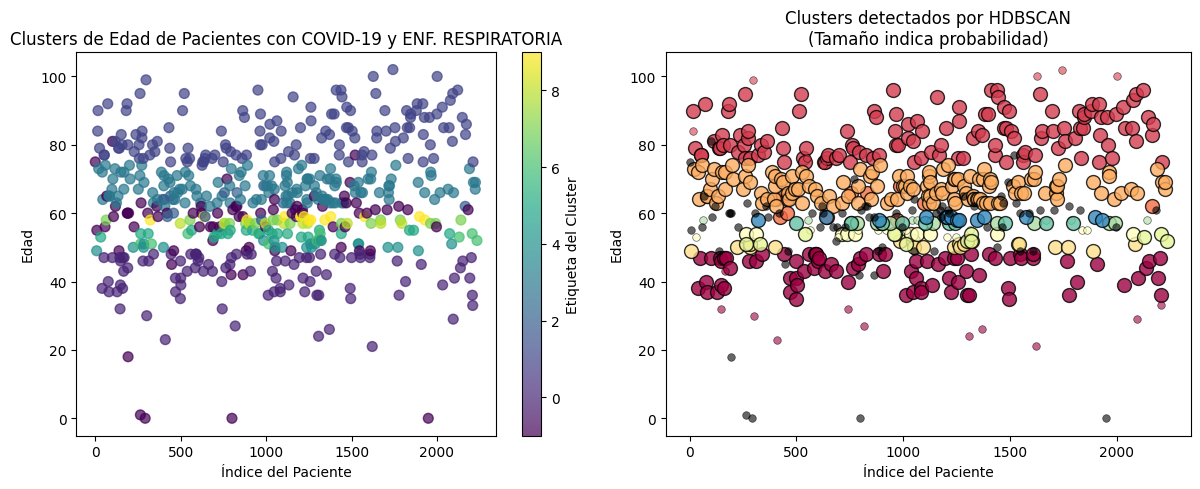

Probabilidad promedio: 0.806
Puntos con alta confianza (>0.5): 432


In [100]:
print(len(df_comorbilidades_grupo_1))
# Crear el objeto HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=3)

# Ajustar el modelo a los datos
clusterer.fit(df_comorbilidades_grupo_1)

# Obtener las etiquetas de cluster (-1 significa ruido)
labels = clusterer.labels_

# Calcular el número de clusters encontrados
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Número de clusters encontrados: {n_clusters}")
print(f"Número de puntos de anomalías: {n_noise}")

# Primera visualización (la que ya funcionaba)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df_comorbilidades_grupo_1.index, df_comorbilidades_grupo_1['EDAD/AGE'], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.title('Clusters de Edad de Pacientes con COVID-19 y ENF. RESPIRATORIA')
plt.xlabel('Índice del Paciente')
plt.ylabel('Edad')
plt.colorbar(label='Etiqueta del Cluster')

# Segunda visualización corregida para HDBSCAN
plt.subplot(1, 2, 2)

# Usar probabilidades en lugar de core_samples_mask
probabilities = clusterer.probabilities_

# Crear máscara basada en probabilidades (puntos con alta probabilidad)
high_prob_mask = probabilities > 0.5  # Umbral ajustable

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro para el ruido
        col = [0, 0, 0, 1]
    
    class_member_mask = (labels == k)
    
    # Puntos con alta probabilidad (equivalente a core samples)
    high_prob_points = df_comorbilidades_grupo_1[class_member_mask & high_prob_mask]
    if len(high_prob_points) > 0:
        plt.scatter(high_prob_points.index, high_prob_points['EDAD/AGE'],
                    c=[col], s=100, alpha=0.8, edgecolors='k', linewidth=1)
    
    # Puntos con baja probabilidad (equivalente a edge points)
    low_prob_points = df_comorbilidades_grupo_1[class_member_mask & ~high_prob_mask]
    if len(low_prob_points) > 0:
        plt.scatter(low_prob_points.index, low_prob_points['EDAD/AGE'], 
                    c=[col], s=30, alpha=0.6, edgecolors='k', linewidth=0.5)

plt.title('Clusters detectados por HDBSCAN\n(Tamaño indica probabilidad)')
plt.xlabel('Índice del Paciente')
plt.ylabel('Edad')

plt.tight_layout()
plt.show()

# Información adicional sobre las probabilidades
print(f"Probabilidad promedio: {probabilities.mean():.3f}")
print(f"Puntos con alta confianza (>0.5): {sum(probabilities > 0.5)}")


In [92]:
# Pacientes con covid-19 sin comorbilidades
df_comorbilidades_grupo_2 = df_comorbilidades[(df_comorbilidades['HIPER_ART/ART_HYPER'] == 0) &
(df_comorbilidades['DIABETES/DIABETES'] == 0) &
(df_comorbilidades['ENF_CARDIO/CARDIO_DISEASE'] == 0) &
(df_comorbilidades['ENF_RENAL/KIDNEY_DISEASE'] == 0) &
(df_comorbilidades['ENF_RESPIRA/RESPI_DISEASE'] == 0) &
(df_comorbilidades['OBESITIDAD/OBESITY'] == 0) &
(df_comorbilidades['CANCER/CANCER'] == 0) &
(df_comorbilidades['INMUNO/IMMUNO'] == 0) &
(df_comorbilidades['ENF_HEPATICA/LIVER_DISEASE'] == 0) &
(df_comorbilidades['VIH/SIDA'] == 0) &
(df_comorbilidades['TUBERCULOSIS/TUBERCULOSIS'] == 0) &
(df_comorbilidades['TRAST_NEURO/NEURO_DISORDERS'] == 0) &
(df_comorbilidades['TRAST_CEL_FALCI/SICKLE_CELL_DIS'] == 0) &
(df_comorbilidades['TABAQUISMO/SMOKING'] == 0)]

In [93]:
import numpy as np

dataset_size = len(df_comorbilidades_grupo_2)
min_cluster_size = int(dataset_size * 0.02)  # 2% = 20 puntos
print(f"Minimum cluster size: {min_cluster_size}")


Minimum cluster size: 8


411
Número de clusters encontrados: 16
Número de puntos de anomalías: 44


c:\Users\Lenovo\.virtualenvs\R35_sopra_steria-7X5YpWRb\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Lenovo\.virtualenvs\R35_sopra_steria-7X5YpWRb\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


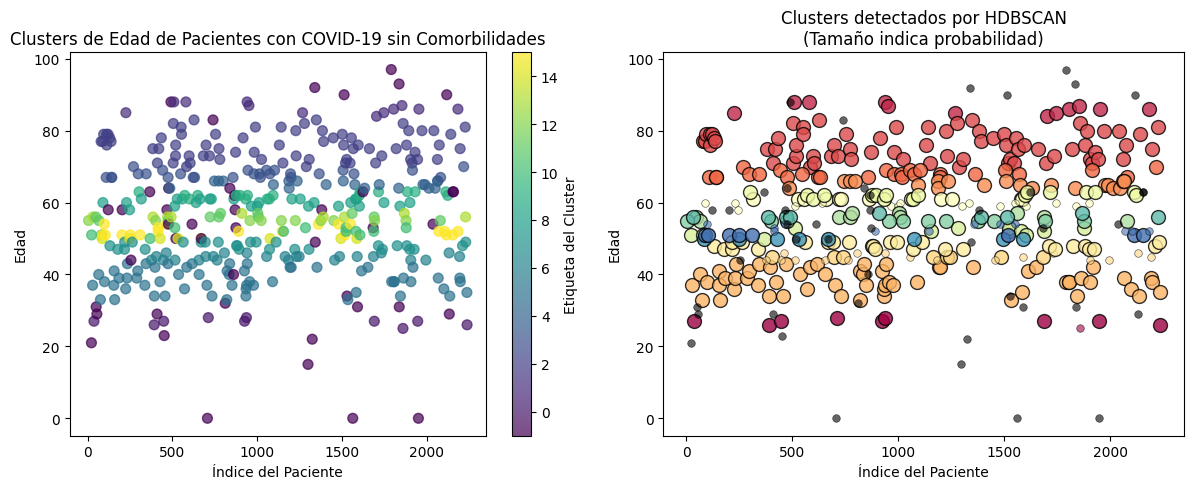

Probabilidad promedio: 0.780
Puntos con alta confianza (>0.5): 321


In [102]:
print(len(df_comorbilidades_grupo_2))
# Crear el objeto HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=8, min_samples=4)

# Ajustar el modelo a los datos
clusterer.fit(df_comorbilidades_grupo_2)

# Obtener las etiquetas de cluster (-1 significa ruido)
labels = clusterer.labels_

# Calcular el número de clusters encontrados
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Número de clusters encontrados: {n_clusters}")
print(f"Número de puntos de anomalías: {n_noise}")

# Primera visualización (la que ya funcionaba)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df_comorbilidades_grupo_2.index, df_comorbilidades_grupo_2['EDAD/AGE'], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.title('Clusters de Edad de Pacientes con COVID-19 sin Comorbilidades')
plt.xlabel('Índice del Paciente')
plt.ylabel('Edad')
plt.colorbar(label='Etiqueta del Cluster')

# Segunda visualización corregida para HDBSCAN
plt.subplot(1, 2, 2)

# Usar probabilidades en lugar de core_samples_mask
probabilities = clusterer.probabilities_

# Crear máscara basada en probabilidades (puntos con alta probabilidad)
high_prob_mask = probabilities > 0.5  # Umbral ajustable

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro para el ruido
        col = [0, 0, 0, 1]
    
    class_member_mask = (labels == k)
    
    # Puntos con alta probabilidad (equivalente a core samples)
    high_prob_points = df_comorbilidades_grupo_2[class_member_mask & high_prob_mask]
    if len(high_prob_points) > 0:
        plt.scatter(high_prob_points.index, high_prob_points['EDAD/AGE'],
                    c=[col], s=100, alpha=0.8, edgecolors='k', linewidth=1)
    
    # Puntos con baja probabilidad (equivalente a edge points)
    low_prob_points = df_comorbilidades_grupo_2[class_member_mask & ~high_prob_mask]
    if len(low_prob_points) > 0:
        plt.scatter(low_prob_points.index, low_prob_points['EDAD/AGE'], 
                    c=[col], s=30, alpha=0.6, edgecolors='k', linewidth=0.5)

plt.title('Clusters detectados por HDBSCAN\n(Tamaño indica probabilidad)')
plt.xlabel('Índice del Paciente')
plt.ylabel('Edad')

plt.tight_layout()
plt.show()

# Información adicional sobre las probabilidades
print(f"Probabilidad promedio: {probabilities.mean():.3f}")
print(f"Puntos con alta confianza (>0.5): {sum(probabilities > 0.5)}")


In [ ]:
# Paciente con covid-19, hipertensión y enf. respiratoria
df_comorbilidades_grupo_3 = df_comorbilidades[(df_comorbilidades['HIPER_ART/ART_HYPER'] == 1) &
(df_comorbilidades['DIABETES/DIABETES'] == 0) &
(df_comorbilidades['ENF_CARDIO/CARDIO_DISEASE'] == 0) &
(df_comorbilidades['ENF_RENAL/KIDNEY_DISEASE'] == 0) &
(df_comorbilidades['ENF_RESPIRA/RESPI_DISEASE'] == 1) &
(df_comorbilidades['OBESITIDAD/OBESITY'] == 0) &
(df_comorbilidades['CANCER/CANCER'] == 0) &
(df_comorbilidades['INMUNO/IMMUNO'] == 0) &
(df_comorbilidades['ENF_HEPATICA/LIVER_DISEASE'] == 0) &
(df_comorbilidades['VIH/SIDA'] == 0) &
(df_comorbilidades['TUBERCULOSIS/TUBERCULOSIS'] == 0) &
(df_comorbilidades['TRAST_NEURO/NEURO_DISORDERS'] == 0) &
(df_comorbilidades['TRAST_CEL_FALCI/SICKLE_CELL_DIS'] == 0) &
(df_comorbilidades['TABAQUISMO/SMOKING'] == 0)]

In [79]:
dataset_size = len(df_comorbilidades_grupo_3)
min_cluster_size = int(dataset_size * 0.02)  # 2% = 20 puntos
print(f"Minimum cluster size: {min_cluster_size}")

Minimum cluster size: 5


265
Número de clusters encontrados: 22
Número de puntos de anomalías: 66


c:\Users\Lenovo\.virtualenvs\R35_sopra_steria-7X5YpWRb\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Lenovo\.virtualenvs\R35_sopra_steria-7X5YpWRb\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


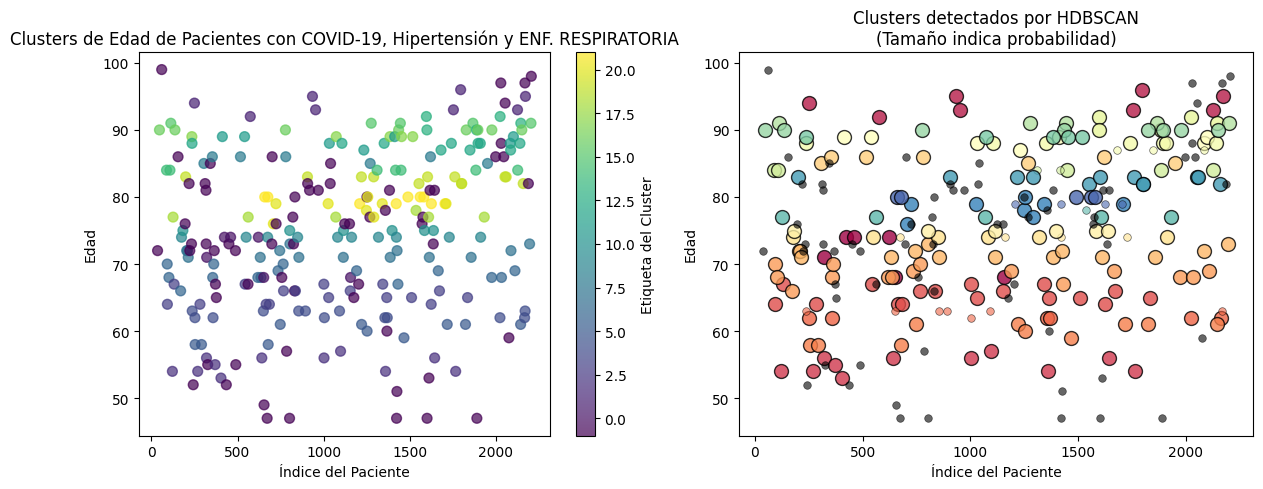

Probabilidad promedio: 0.672
Puntos con alta confianza (>0.5): 178


In [105]:
print(len(df_comorbilidades_grupo_3))
# Crear el objeto HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=3)

# Ajustar el modelo a los datos
clusterer.fit(df_comorbilidades_grupo_3)

# Obtener las etiquetas de cluster (-1 significa ruido)
labels = clusterer.labels_

# Calcular el número de clusters encontrados
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Número de clusters encontrados: {n_clusters}")
print(f"Número de puntos de anomalías: {n_noise}")

# Primera visualización (la que ya funcionaba)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df_comorbilidades_grupo_3.index, df_comorbilidades_grupo_3['EDAD/AGE'], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.title('Clusters de Edad de Pacientes con COVID-19, Hipertensión y ENF. RESPIRATORIA')
plt.xlabel('Índice del Paciente')
plt.ylabel('Edad')
plt.colorbar(label='Etiqueta del Cluster')

# Segunda visualización corregida para HDBSCAN
plt.subplot(1, 2, 2)

# Usar probabilidades en lugar de core_samples_mask
probabilities = clusterer.probabilities_

# Crear máscara basada en probabilidades (puntos con alta probabilidad)
high_prob_mask = probabilities > 0.5  # Umbral ajustable

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro para el ruido
        col = [0, 0, 0, 1]
    
    class_member_mask = (labels == k)
    
    # Puntos con alta probabilidad (equivalente a core samples)
    high_prob_points = df_comorbilidades_grupo_3[class_member_mask & high_prob_mask]
    if len(high_prob_points) > 0:
        plt.scatter(high_prob_points.index, high_prob_points['EDAD/AGE'],
                    c=[col], s=100, alpha=0.8, edgecolors='k', linewidth=1)
    
    # Puntos con baja probabilidad (equivalente a edge points)
    low_prob_points = df_comorbilidades_grupo_3[class_member_mask & ~high_prob_mask]
    if len(low_prob_points) > 0:
        plt.scatter(low_prob_points.index, low_prob_points['EDAD/AGE'], 
                    c=[col], s=30, alpha=0.6, edgecolors='k', linewidth=0.5)

plt.title('Clusters detectados por HDBSCAN\n(Tamaño indica probabilidad)')
plt.xlabel('Índice del Paciente')
plt.ylabel('Edad')

plt.tight_layout()
plt.show()

# Información adicional sobre las probabilidades
print(f"Probabilidad promedio: {probabilities.mean():.3f}")
print(f"Puntos con alta confianza (>0.5): {sum(probabilities > 0.5)}")


In [96]:
# Paciente con covid-19 e hipertensión
df_comorbilidades_grupo_4 = df_comorbilidades[(df_comorbilidades['HIPER_ART/ART_HYPER'] == 1) &
(df_comorbilidades['DIABETES/DIABETES'] == 0) &
(df_comorbilidades['ENF_CARDIO/CARDIO_DISEASE'] == 0) &
(df_comorbilidades['ENF_RENAL/KIDNEY_DISEASE'] == 0) &
(df_comorbilidades['ENF_RESPIRA/RESPI_DISEASE'] == 0) &
(df_comorbilidades['OBESITIDAD/OBESITY'] == 0) &
(df_comorbilidades['CANCER/CANCER'] == 0) &
(df_comorbilidades['INMUNO/IMMUNO'] == 0) &
(df_comorbilidades['ENF_HEPATICA/LIVER_DISEASE'] == 0) &
(df_comorbilidades['VIH/SIDA'] == 0) &
(df_comorbilidades['TUBERCULOSIS/TUBERCULOSIS'] == 0) &
(df_comorbilidades['TRAST_NEURO/NEURO_DISORDERS'] == 0) &
(df_comorbilidades['TRAST_CEL_FALCI/SICKLE_CELL_DIS'] == 0) &
(df_comorbilidades['TABAQUISMO/SMOKING'] == 0)]

In [82]:
dataset_size = len(df_comorbilidades_grupo_4)
min_cluster_size = int(dataset_size * 0.02)  # 2% = 20 puntos
print(f"Minimum cluster size: {min_cluster_size}")

Minimum cluster size: 3


153
Número de clusters encontrados: 9
Número de puntos de anomalías: 13


c:\Users\Lenovo\.virtualenvs\R35_sopra_steria-7X5YpWRb\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Lenovo\.virtualenvs\R35_sopra_steria-7X5YpWRb\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


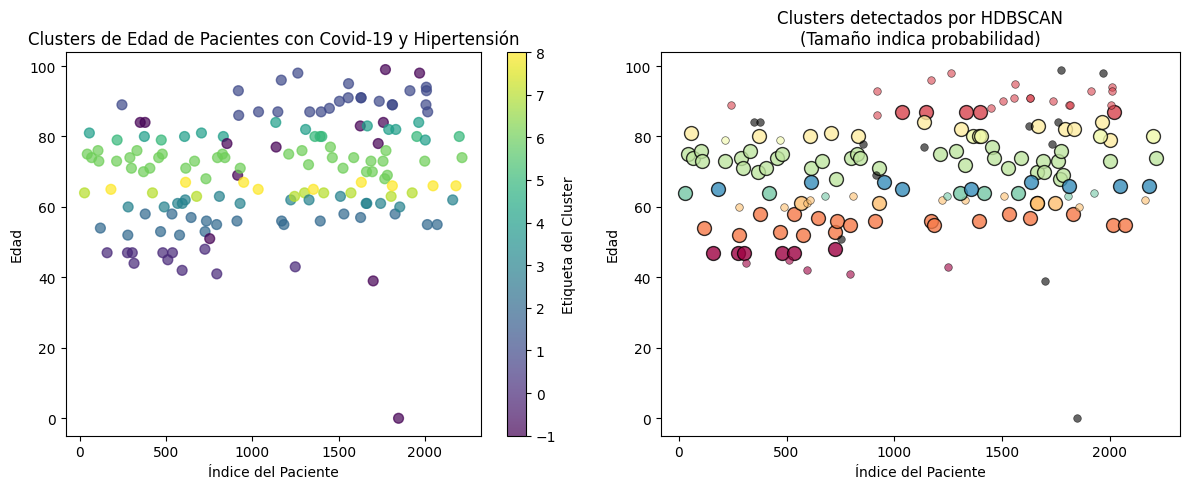

Probabilidad promedio: 0.672
Puntos con alta confianza (>0.5): 101


In [106]:
print(len(df_comorbilidades_grupo_4))
# Crear el objeto HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=3)

# Ajustar el modelo a los datos
clusterer.fit(df_comorbilidades_grupo_4)

# Obtener las etiquetas de cluster (-1 significa ruido)
labels = clusterer.labels_

# Calcular el número de clusters encontrados
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Número de clusters encontrados: {n_clusters}")
print(f"Número de puntos de anomalías: {n_noise}")

# Primera visualización (la que ya funcionaba)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df_comorbilidades_grupo_4.index, df_comorbilidades_grupo_4['EDAD/AGE'], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.title('Clusters de Edad de Pacientes con Covid-19 y Hipertensión')
plt.xlabel('Índice del Paciente')
plt.ylabel('Edad')
plt.colorbar(label='Etiqueta del Cluster')

# Segunda visualización corregida para HDBSCAN
plt.subplot(1, 2, 2)

# Usar probabilidades en lugar de core_samples_mask
probabilities = clusterer.probabilities_

# Crear máscara basada en probabilidades (puntos con alta probabilidad)
high_prob_mask = probabilities > 0.5  # Umbral ajustable

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro para el ruido
        col = [0, 0, 0, 1]
    
    class_member_mask = (labels == k)
    
    # Puntos con alta probabilidad (equivalente a core samples)
    high_prob_points = df_comorbilidades_grupo_4[class_member_mask & high_prob_mask]
    if len(high_prob_points) > 0:
        plt.scatter(high_prob_points.index, high_prob_points['EDAD/AGE'],
                    c=[col], s=100, alpha=0.8, edgecolors='k', linewidth=1)
    
    # Puntos con baja probabilidad (equivalente a edge points)
    low_prob_points = df_comorbilidades_grupo_4[class_member_mask & ~high_prob_mask]
    if len(low_prob_points) > 0:
        plt.scatter(low_prob_points.index, low_prob_points['EDAD/AGE'], 
                    c=[col], s=30, alpha=0.6, edgecolors='k', linewidth=0.5)

plt.title('Clusters detectados por HDBSCAN\n(Tamaño indica probabilidad)')
plt.xlabel('Índice del Paciente')
plt.ylabel('Edad')

plt.tight_layout()
plt.show()

# Información adicional sobre las probabilidades
print(f"Probabilidad promedio: {probabilities.mean():.3f}")
print(f"Puntos con alta confianza (>0.5): {sum(probabilities > 0.5)}")


In [97]:
# Paciente con covid-19, hipertension, diabetes y enf. respiratoria
df_comorbilidades_grupo_5 = df_comorbilidades[(df_comorbilidades['HIPER_ART/ART_HYPER'] == 1) &
(df_comorbilidades['DIABETES/DIABETES'] == 1) &
(df_comorbilidades['ENF_CARDIO/CARDIO_DISEASE'] == 0) &
(df_comorbilidades['ENF_RENAL/KIDNEY_DISEASE'] == 0) &
(df_comorbilidades['ENF_RESPIRA/RESPI_DISEASE'] == 1) &
(df_comorbilidades['OBESITIDAD/OBESITY'] == 0) &
(df_comorbilidades['CANCER/CANCER'] == 0) &
(df_comorbilidades['INMUNO/IMMUNO'] == 0) &
(df_comorbilidades['ENF_HEPATICA/LIVER_DISEASE'] == 0) &
(df_comorbilidades['VIH/SIDA'] == 0) &
(df_comorbilidades['TUBERCULOSIS/TUBERCULOSIS'] == 0) &
(df_comorbilidades['TRAST_NEURO/NEURO_DISORDERS'] == 0) &
(df_comorbilidades['TRAST_CEL_FALCI/SICKLE_CELL_DIS'] == 0) &
(df_comorbilidades['TABAQUISMO/SMOKING'] == 0)]

In [85]:
dataset_size = len(df_comorbilidades_grupo_5)
min_cluster_size = int(dataset_size * 0.02)  # 2% = 20 puntos
print(f"Minimum cluster size: {min_cluster_size}")

Minimum cluster size: 1


69
Número de clusters encontrados: 2
Número de puntos de anomalías: 4


c:\Users\Lenovo\.virtualenvs\R35_sopra_steria-7X5YpWRb\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Lenovo\.virtualenvs\R35_sopra_steria-7X5YpWRb\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


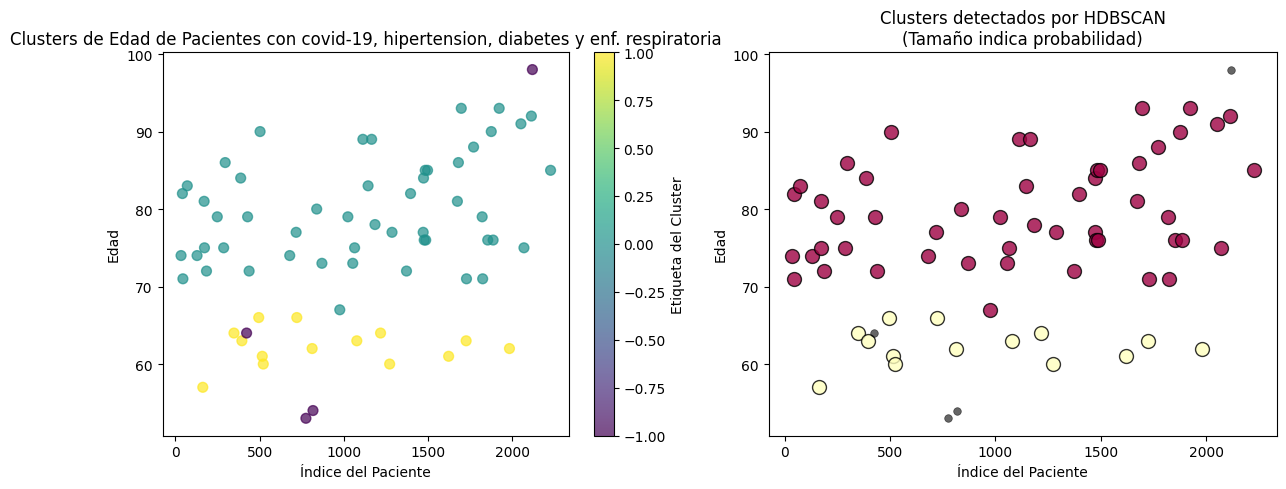

Probabilidad promedio: 0.914
Puntos con alta confianza (>0.5): 65


In [109]:
print(len(df_comorbilidades_grupo_5))
# Crear el objeto HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=5)

# Ajustar el modelo a los datos
clusterer.fit(df_comorbilidades_grupo_5)

# Obtener las etiquetas de cluster (-1 significa ruido)
labels = clusterer.labels_

# Calcular el número de clusters encontrados
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Número de clusters encontrados: {n_clusters}")
print(f"Número de puntos de anomalías: {n_noise}")

# Primera visualización (la que ya funcionaba)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df_comorbilidades_grupo_5.index, df_comorbilidades_grupo_5['EDAD/AGE'], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.title('Clusters de Edad de Pacientes con covid-19, hipertension, diabetes y enf. respiratoria')
plt.xlabel('Índice del Paciente')
plt.ylabel('Edad')
plt.colorbar(label='Etiqueta del Cluster')

# Segunda visualización corregida para HDBSCAN
plt.subplot(1, 2, 2)

# Usar probabilidades en lugar de core_samples_mask
probabilities = clusterer.probabilities_

# Crear máscara basada en probabilidades (puntos con alta probabilidad)
high_prob_mask = probabilities > 0.5  # Umbral ajustable

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro para el ruido
        col = [0, 0, 0, 1]
    
    class_member_mask = (labels == k)
    
    # Puntos con alta probabilidad (equivalente a core samples)
    high_prob_points = df_comorbilidades_grupo_5[class_member_mask & high_prob_mask]
    if len(high_prob_points) > 0:
        plt.scatter(high_prob_points.index, high_prob_points['EDAD/AGE'],
                    c=[col], s=100, alpha=0.8, edgecolors='k', linewidth=1)
    
    # Puntos con baja probabilidad (equivalente a edge points)
    low_prob_points = df_comorbilidades_grupo_5[class_member_mask & ~high_prob_mask]
    if len(low_prob_points) > 0:
        plt.scatter(low_prob_points.index, low_prob_points['EDAD/AGE'], 
                    c=[col], s=30, alpha=0.6, edgecolors='k', linewidth=0.5)

plt.title('Clusters detectados por HDBSCAN\n(Tamaño indica probabilidad)')
plt.xlabel('Índice del Paciente')
plt.ylabel('Edad')

plt.tight_layout()
plt.show()

# Información adicional sobre las probabilidades
print(f"Probabilidad promedio: {probabilities.mean():.3f}")
print(f"Puntos con alta confianza (>0.5): {sum(probabilities > 0.5)}")


# Patrones farmacológicos por edad

In [191]:
df_farma = df_covid.copy()

In [192]:
df_farma = df_farma[['EDAD/AGE', 'FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME']]
df_farma

,EDAD/AGE,FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME
0,75,RELVAR ELLIPTA inh (92+22) mcg/inh
1,62,EFEDRINA amp 50 mg/5 mL
2,69,MORFINA amp 1% 1 mL (10 mg/1 mL)
3,67,ACFOL comp 5 mg
4,72,BISOPROLOL comp 5 mg
...,...,...
2233,87,ASPIRINA comp 500 mg
2234,52,DOLQUINE comp 200 mg
2235,79,DOLQUINE comp 200 mg
2236,35,DEXCLORFENIRAMINA amp 5 mg/1 mL


Tabla de frecuencias de FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME por EDAD/AGE:


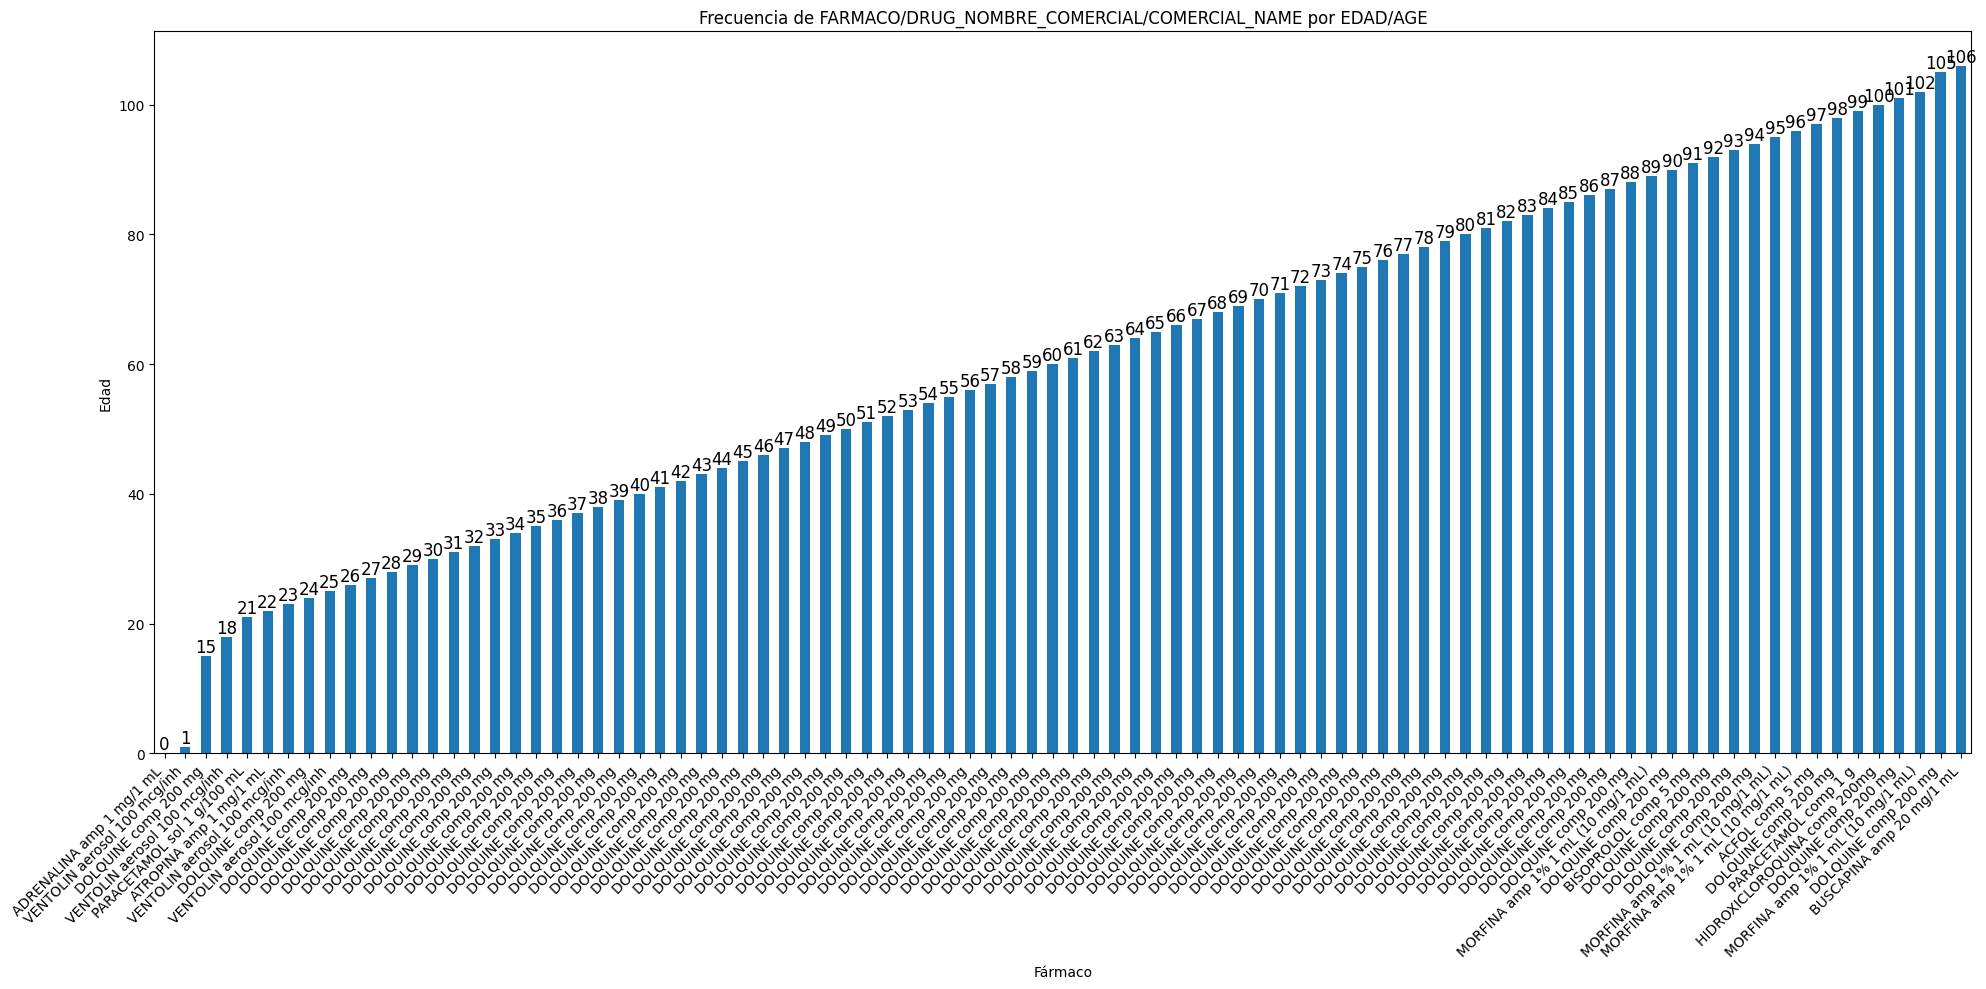

In [193]:
# Relación entre dos variables categóricas
tabla = pd.crosstab(df_farma['EDAD/AGE'], df_farma['FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME'])
# agrupar por FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME y EDAD/AGE
tabla = df_farma.groupby(['FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME', 'EDAD/AGE']).size().reset_index(name='counts')
# ordenar por EDAD/AGE y counts
tabla = tabla.sort_values(by=['EDAD/AGE', 'counts'], ascending=[True, False])
#mostrar los valores máximos de cada EDAD/AGE
tabla_max = tabla.loc[tabla.groupby('EDAD/AGE')['counts'].idxmax()]
print("Tabla de frecuencias de FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME por EDAD/AGE:")

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))  # Tamaño grande y manejable
ax = tabla_max.plot(
    kind='bar',
    x='FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME',
    y='EDAD/AGE',
    legend=False,
    ax=plt.gca()
)
plt.title('Frecuencia de FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME por EDAD/AGE')
plt.xlabel('Fármaco')
plt.ylabel('Edad')
plt.xticks(rotation=45, ha='right')  # Mejor legibilidad

# Añadir etiquetas encima de cada barra
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # posición x centrada
        p.get_height(),                 # posición y encima de la barra
        str(int(p.get_height())),       # valor a mostrar
        ha='center', va='bottom', fontsize=12
    )

plt.tight_layout()
plt.show()


In [194]:
df_farma['FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME'].unique()

array(['RELVAR ELLIPTA inh (92+22) mcg/inh', 'EFEDRINA amp 50 mg/5 mL',
       'MORFINA amp 1% 1 mL (10 mg/1 mL)', 'ACFOL comp 5 mg',
       'BISOPROLOL comp 5 mg', 'PARACETAMOL sol 1 g/100 mL',
       'AGUA BIDESTILADA amp 10 mL', 'PARACETAMOL comp 1 g',
       'VENTOLIN aerosol 100 mcg/inh', 'MST CONTINUS comp 30 mg',
       'DOBUTAMINA amp 250 mg/20 mL', 'NORAGES amp 8 mg/4 mL',
       'TOSEINA sol 2 mg/mL F/250 mL', 'SALBUAIR amp 5 mg/2,5 mL (0,2%)',
       'DOPAMINA amp 200 mg/5 mL', 'CODEISAN comp 28,7 mg',
       'TRANDATE amp 100 mg/20 mL', 'CARVEDILOL comp 25 mg',
       'DOLQUINE comp 200 mg', 'ACIDO ASCORBICO amp 1 g/5 mL',
       'RESOCHIN comp 250 mg', 'ADRENALINA amp 1 mg/1 mL',
       'BROMURO IPRATROPIO aerosol 250 mcg/1 mL',
       'ONDANSETRON amp 4 mg/2 mL', 'LEVOFLOXACINO bolsa 500 mg/100 mL',
       'BUSCAPINA amp 20 mg/1 mL', 'HIDROXICLOROQUINA comp 200mg',
       'TENORMIN comp 50 mg', 'CARVEDILOL comp 6,25 mg',
       'VENTOLIN amp 0,5 mg/1 mL', 'ULUNAR INH. 85/

In [195]:
Medicina= ['RELVAR ELLIPTA inh (92+22) mcg/inh', 'EFEDRINA amp 50 mg/5 mL',
        'MORFINA amp 1% 1 mL (10 mg/1 mL)', 'ACFOL comp 5 mg',
        'BISOPROLOL comp 5 mg', 'PARACETAMOL sol 1 g/100 mL',
        'AGUA BIDESTILADA amp 10 mL', 'PARACETAMOL comp 1 g',
        'VENTOLIN aerosol 100 mcg/inh', 'MST CONTINUS comp 30 mg',
        'DOBUTAMINA amp 250 mg/20 mL', 'NORAGES amp 8 mg/4 mL',
        'TOSEINA sol 2 mg/mL F/250 mL', 'SALBUAIR amp 5 mg/2,5 mL (0,2%)',
        'DOPAMINA amp 200 mg/5 mL', 'CODEISAN comp 28,7 mg',
        'TRANDATE amp 100 mg/20 mL', 'CARVEDILOL comp 25 mg',
        'DOLQUINE comp 200 mg', 'ACIDO ASCORBICO amp 1 g/5 mL',
        'RESOCHIN comp 250 mg', 'ADRENALINA amp 1 mg/1 mL',
        'BROMURO IPRATROPIO aerosol 250 mcg/1 mL',
        'ONDANSETRON amp 4 mg/2 mL', 'LEVOFLOXACINO bolsa 500 mg/100 mL',
        'BUSCAPINA amp 20 mg/1 mL', 'HIDROXICLOROQUINA comp 200mg',
        'TENORMIN comp 50 mg', 'CARVEDILOL comp 6,25 mg',
        'VENTOLIN amp 0,5 mg/1 mL', 'ULUNAR INH. 85/43mcg',
        'CEFTRIAXONA vial IV 1 g', 'AMCHAFIBRIN amp 500 mg/5 mL',
        'BELOKEN comp 100 mg', 'DEXCLORFENIRAMINA amp 5 mg/1 mL',
        'SUMIAL comp 10 mg', 'MST CONTINUS comp 10 mg',
        'MEPIVACAINA amp 1% 10 mL (100 mg/10 mL)',
        'POLARAMINE susp 0,4 mg/mL F/60 mL', 'SUMIAL comp 40 mg',
        'ATROPINA amp 1 mg/1 mL', 'SANDIMMUN NEORAL cap 50 mg',
        'CLAVERSAL comp 500 mg', 'SALAZOPYRINA comp 500mg',
        'SANDIMMUN NEORAL cap 25 mg', 'NORADRENALINA amp 10 mg/10 mL',
        'BUPIVACAINA amp 0,50% 10 mL S/A', 'POLARAMINE comp 2 mg',
        'BUSCAPINA comp 10 mg', 'ALEUDRINA amp 0,2 mg/mL',
        'MIDAZOLAM amp 5 mg/5 mL', 'CORPITOL spray 20 mL',
        'SALOFALK susp rectal 4 g/60 mL', 'HIBOR jer 2.500 UI/0,2 mL',
        'ASPIRINA comp 500 mg', 'TIMOFTOL col 5 mg/mL (0.5%) F/3 mL',
        'LEDERFOLIN comp 15 mg', 'PARACETAMOL comp 650 mg',
        'NEUPRO parche 8 mg/24 h', 'INYESPRIN vial 500 mg',
        'CLORHEXIDINA sb 0,12% 15 mL',
        'SYMBICORT FORTE aerosol (320+9) mcg/pul',
        'TIMOFTOL col 5 mg/mL (0.5%) F/5 mL', 'TARGIN comp (20+10) mg',
        'GANFORT col (5+0,3) mg/mL F/3 mL',
        'DESINCLOR JABONOSO sol 4% F/500 mL', 'ENANTYUM amp 50 mg/2 mL',
        'OXIGENO PLANTA', 'ALCOHOL 70Âº 1L', 'SUERO ClNa 100 mL I.V.',
        'AKINETON comp 2 mg', 'ATROALDO aerosol 20 mcg/inh 200 dosis',
        'TAMSULOSINA cap 0,4 mg', 'SEPTRIN FORTE comp (800+160) mg']

In [196]:
# Crear columnas para tipos de medicinas de la lista Medicina
for medicina in Medicina:
    df_farma[medicina] = df_farma.loc[:, 'FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME'].apply(lambda x: 1 if medicina in str(x) else 0)
# Eliminar columna FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME
df_farma = df_farma.drop(columns=['FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME'])
df_farma

,EDAD/AGE,RELVAR ELLIPTA inh (92+22) mcg/inh,EFEDRINA amp 50 mg/5 mL,MORFINA amp 1% 1 mL (10 mg/1 mL),ACFOL comp 5 mg,BISOPROLOL comp 5 mg,PARACETAMOL sol 1 g/100 mL,AGUA BIDESTILADA amp 10 mL,PARACETAMOL comp 1 g,VENTOLIN aerosol 100 mcg/inh,...,"GANFORT col (5+0,3) mg/mL F/3 mL",DESINCLOR JABONOSO sol 4% F/500 mL,ENANTYUM amp 50 mg/2 mL,OXIGENO PLANTA,ALCOHOL 70Âº 1L,SUERO ClNa 100 mL I.V.,AKINETON comp 2 mg,ATROALDO aerosol 20 mcg/inh 200 dosis,"TAMSULOSINA cap 0,4 mg",SEPTRIN FORTE comp (800+160) mg
0,75,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,62,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,69,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,67,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,72,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,87,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2234,52,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2235,79,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2236,35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [197]:
# agrupar por EDAD/AGE y sumar las columnas de medicinas
df_farma_grouped = df_farma.groupby('EDAD/AGE')[Medicina].sum().reset_index()
df_farma_grouped

,EDAD/AGE,RELVAR ELLIPTA inh (92+22) mcg/inh,EFEDRINA amp 50 mg/5 mL,MORFINA amp 1% 1 mL (10 mg/1 mL),ACFOL comp 5 mg,BISOPROLOL comp 5 mg,PARACETAMOL sol 1 g/100 mL,AGUA BIDESTILADA amp 10 mL,PARACETAMOL comp 1 g,VENTOLIN aerosol 100 mcg/inh,...,"GANFORT col (5+0,3) mg/mL F/3 mL",DESINCLOR JABONOSO sol 4% F/500 mL,ENANTYUM amp 50 mg/2 mL,OXIGENO PLANTA,ALCOHOL 70Âº 1L,SUERO ClNa 100 mL I.V.,AKINETON comp 2 mg,ATROALDO aerosol 20 mcg/inh 200 dosis,"TAMSULOSINA cap 0,4 mg",SEPTRIN FORTE comp (800+160) mg
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,18,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,21,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,100,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84,101,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85,102,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86,105,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [198]:
def get_medicines(row):
    medicines = []
    for medicine in Medicina:
        if row[medicine] == 1:
            medicines.append(medicine)
    return ', '.join(medicines)
# aplicar la función a cada fila
df_farma_grouped['Medicinas_administradas'] = df_farma_grouped.apply(get_medicines, axis=1)

In [199]:
df_farma_grouped

,EDAD/AGE,RELVAR ELLIPTA inh (92+22) mcg/inh,EFEDRINA amp 50 mg/5 mL,MORFINA amp 1% 1 mL (10 mg/1 mL),ACFOL comp 5 mg,BISOPROLOL comp 5 mg,PARACETAMOL sol 1 g/100 mL,AGUA BIDESTILADA amp 10 mL,PARACETAMOL comp 1 g,VENTOLIN aerosol 100 mcg/inh,...,DESINCLOR JABONOSO sol 4% F/500 mL,ENANTYUM amp 50 mg/2 mL,OXIGENO PLANTA,ALCOHOL 70Âº 1L,SUERO ClNa 100 mL I.V.,AKINETON comp 2 mg,ATROALDO aerosol 20 mcg/inh 200 dosis,"TAMSULOSINA cap 0,4 mg",SEPTRIN FORTE comp (800+160) mg,Medicinas_administradas
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,"PARACETAMOL sol 1 g/100 mL, DOLQUINE comp 200 ..."
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,VENTOLIN aerosol 100 mcg/inh
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,DOLQUINE comp 200 mg
3,18,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,VENTOLIN aerosol 100 mcg/inh
4,21,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,"PARACETAMOL sol 1 g/100 mL, VENTOLIN aerosol 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,100,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"MORFINA amp 1% 1 mL (10 mg/1 mL), HIDROXICLORO..."
84,101,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,DOLQUINE comp 200 mg
85,102,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,MORFINA amp 1% 1 mL (10 mg/1 mL)
86,105,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,DOLQUINE comp 200 mg


In [200]:
df_farma_global = df_farma_grouped[['EDAD/AGE', 'Medicinas_administradas']]
print("Medicinas administradas por edad:")
print(df_farma_global)

Medicinas administradas por edad:
    EDAD/AGE                            Medicinas_administradas
0          0  PARACETAMOL sol 1 g/100 mL, DOLQUINE comp 200 ...
1          1                       VENTOLIN aerosol 100 mcg/inh
2         15                               DOLQUINE comp 200 mg
3         18                       VENTOLIN aerosol 100 mcg/inh
4         21  PARACETAMOL sol 1 g/100 mL, VENTOLIN aerosol 1...
..       ...                                                ...
83       100  MORFINA amp 1% 1 mL (10 mg/1 mL), HIDROXICLORO...
84       101                               DOLQUINE comp 200 mg
85       102                   MORFINA amp 1% 1 mL (10 mg/1 mL)
86       105                               DOLQUINE comp 200 mg
87       106                           BUSCAPINA amp 20 mg/1 mL

[88 rows x 2 columns]


In [201]:
df_farma_grouped.drop(columns='Medicinas_administradas', inplace=True)